In [122]:
import scipy.stats as scs

import pandas as pd
import numpy as np
from numpy import load
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [4]:
log_returns = load('log_returns.npy')
log_returns

array([[-0.0580781 ,  0.02145173, -0.00302892, ...,  0.05046365,
        -0.10230891, -0.0364088 ],
       [ 0.01574724,  0.04242623,  0.01435639, ...,  0.02780013,
        -0.05347221,  0.04058759],
       [ 0.18264679,  0.02520884,  0.01099809, ..., -0.06097471,
         0.09488007,  0.04116843],
       ...,
       [-0.04739096,  0.02528   ,  0.16170195, ...,  0.04100169,
        -0.04298896, -0.06396934],
       [ 0.02310581,  0.05310669, -0.09162051, ..., -0.07705836,
         0.17711031,  0.05086723],
       [-0.00529571, -0.05297235,  0.15779401, ..., -0.06700954,
        -0.09390989, -0.0587643 ]])

In [24]:
def normality_test(arr):
    print("Skew of data set",round(scs.skew(arr),5))
    print("Skew test p-value",round(scs.skewtest(arr)[1],5))
    print("Kurt fo data set",round(scs.kurtosis(arr),5))
    print("Kurt test p-value",round(scs.kurtosistest(arr)[1],5))
    print("Norm test p-value",round(scs.normaltest(arr)[1],5))

In [25]:
normality_test(log_returns.flatten())

Skew of data set 0.00055
Skew test p-value 0.42995
Kurt fo data set 0.00085
Kurt test p-value 0.54065
Norm test p-value 0.60736


In [ ]:
# Skew >> 0에 가까움 (0.05 미만) >> 샘플 자료의 왜도가 정규분포와 일치
# Skew test pvalue >> 0,05 초과 >> 통계적으로 유의

# Kurt >> 0에 가까움 (0.05 미만) >> 샘플 자료의 왜도가 정규분포와 일치
# Kurt test pvalue >> 0,05 초과 >> 통계적으로 유의

# Norm test >> 왜도 첨도 검정을 조합한 정규성 검정 >> 0.05 이상이므로 통계적으로 유의하다.

In [28]:
paths = pd.read_csv("pre_r.csv")

In [38]:
paths[-1:]

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
50,39.203688,68.753916,39.37959,30.326767,37.904881,17.371818,22.819308,32.605775,38.044843,45.239453,...,77.767964,56.054704,28.448982,57.903996,14.021759,23.961453,53.245079,36.121509,41.73349,51.68521


Text(0.5, 1.0, 'log data')

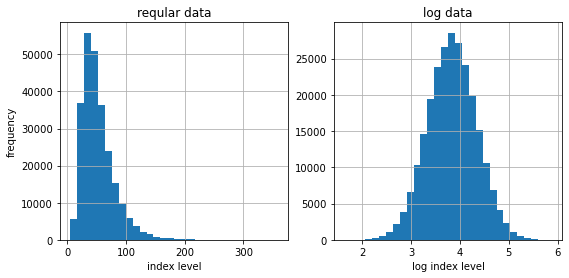

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
ax1.hist(paths[-1:], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('reqular data')
ax2.hist(np.log(paths[-1:]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [ ]:
plt.hist(log_returns.flatten(), bins=70,density=True,label='frequency', color='gray')
plt.grid(True)
plt.xlabel('log_return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc= 0.05 / 50, scale= 0.5 / np.sqrt(50)),
        'r', lw=2.0, label='pdf')
plt.legend()

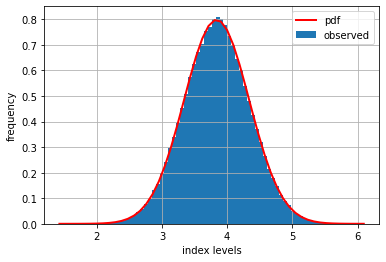

In [121]:
log_data = np.log(paths[-1:])
plt.hist(log_data, bins=70, density=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.T[50].mean(), log_data.T[50].std()),
        'r', lw=2, label='pdf')
plt.legend()

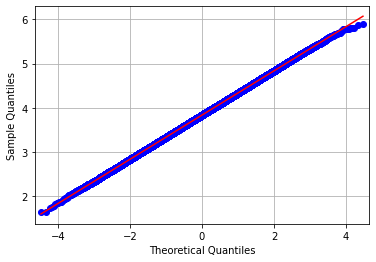

In [124]:
sm.qqplot(log_data.T[50], line='s')
plt.grid(True)